In [1]:
#!pip install hdbscan
#conda install -c conda-forge hdbscan

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached https://files.pythonhosted.org/packages/12/d7/e44040f98db06fb62a412fff640ac0a524b81fd38449a034a3619b1569fb/Cython-0.29.23-cp36-cp36m-win_amd64.whl
  Running setup.py clean for hdbscan
Failed to build hdbscan


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\marta\anaconda3\envs\emoti\python.exe' 'C:\Users\marta\anaconda3\envs\emoti\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\marta\AppData\Local\Temp\tmpo7vi7s7a'
       cwd: C:\Users\marta\AppData\Local\Temp\pip-install-u3_2ab4b\hdbscan\
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-3.6\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-3.6\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-3.6\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-3.6\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-3.6\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-3.6\hdbscan
  copying hdbscan\__init__.py -> build\lib.win-amd64-3.6\hdbscan
  creating build\l

In [80]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import DistanceMetric
from scipy.spatial.distance import pdist
from sklearn.metrics import pairwise_distances

#countar os itens de uma lista
from collections import Counter
#separar treino, teste, validação
from sklearn.model_selection import train_test_split
# métricas de avaliação do K-Means
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
#

from pathlib import Path


# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())

DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIR_BASE = DIR_PREFIXO / "Projeto_PA" / "dataset_modificado"

ModuleNotFoundError: No module named 'hdbscan'

In [55]:
df = pd.read_csv(DIR_BASE / "pacientes_completos_tratados.csv", encoding="Latin1", delimiter=";")
df.head()


,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,105.0,108.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,103.0,114.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,147.0,148.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,140.0,139.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,113.0,110.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11


In [61]:
def boolParaInt(valor):
    if valor == True:
        return 1
    elif valor == False:
        return 0

df_numerico = pd.DataFrame()

for coluna in list(df.loc[:,'Hipotensao':'Normotenso'].columns):
    df_numerico[coluna] = df.loc[:,coluna].apply(boolParaInt)

df_numerico
array_numerico = np.array(df_numerico)
array_numerico.shape

(19263, 11)

In [62]:
from sklearn.cluster import DBSCAN

import numpy as np
#X = np.array([[0, 1], [1, 1], [0, 0],
#              [1, 0], [1, 0], [1, 1],[0, 1],[1, 1],[0, 0],[1, 0]])
X = array_numerico
#clustering = DBSCAN(eps=0.5, min_samples=2).fit(X)
clustering = hdbscan.HDBSCAN(min_cluster_size=2, metric='precomputed')
clustering.fit(X)
clustering.labels_

clustering


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [68]:
grupos = clustering.labels_
grupos

array([ 0,  0,  1, ...,  1, 13,  6], dtype=int64)

In [69]:
# Separa o grupo de dados para treino e teste

#X_train, X_test, y_train, y_test = train_test_split(X, grupos, test_size=0.15, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, grupos, test_size=0.15, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

((2890, 11), (2890,))

In [75]:
len(classes)

19263

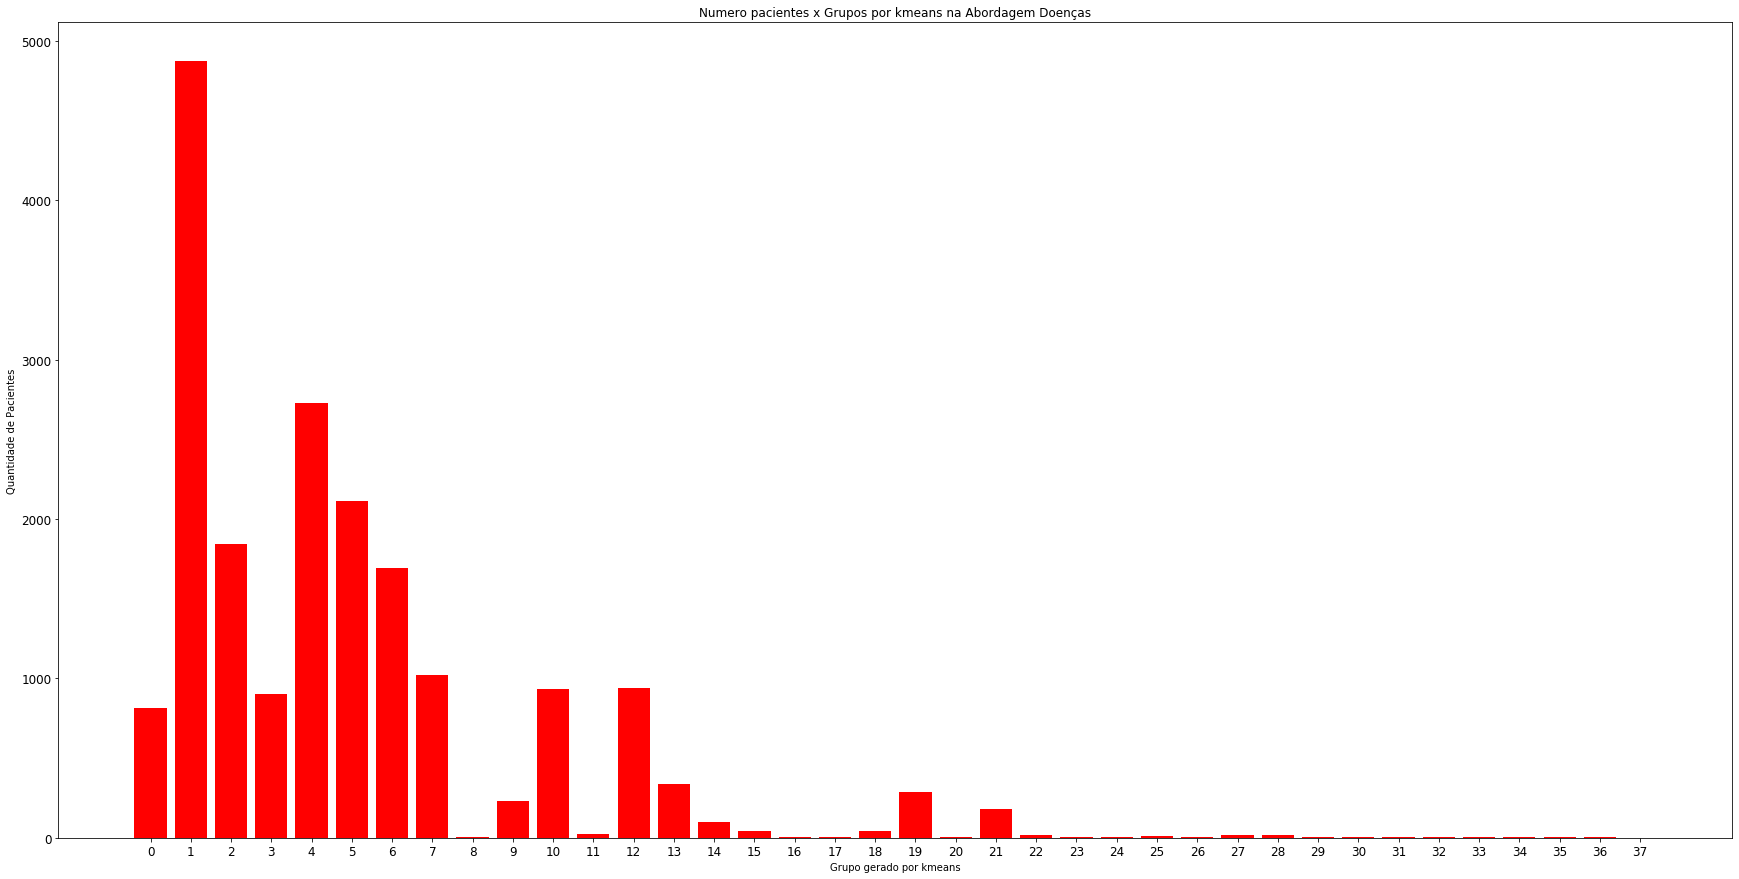

Wall time: 150 ms
Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0
Accuracy: 0.9990916169218791 - Recall: 0.9305555555555556 - F1 Score: 0.9337879701645778


c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,336,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1895,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,733,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,337,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1081,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,885,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,694,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,413,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,84,...,0,0,0,0,0,0,0,0,0,0


In [79]:
from sklearn.ensemble import RandomForestClassifier

#parametro simples do modelo
random_forest = RandomForestClassifier(n_estimators=50)


#base para modelo
classes = []
qtds = []

contagem = Counter(grupos)

for i in range(0,len(set(grupos))):
    classes.append(i)
    qtds.append(contagem[i])
plt.figure(figsize=(30,15))
plt.bar(classes,qtds,color="red")
plt.xticks(classes)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('Grupo gerado por kmeans')
plt.title('Numero pacientes x Grupos por kmeans na Abordagem Doenças')
fig = plt.gcf()
#fig.savefig(DIR_KMEANS / 'graficos' / 'grafico_Random_Abordagem3_doenca_por_grupos.svg',format="svg")
plt.show()

#salvar a imagem
#fig.savefig('padrao_doencas/qtd_x_padrao_doencas.png', format='png')

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

#separar train(75%) - 14.485, test (10%) - 7.726  and validation (15%) - 11.588

#x_train, x_test, y_train, y_test = train_test_split(X, grupos, test_size=1 - train_ratio,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, grupos, test_size=1 - train_ratio,random_state=42)

#x_val, x_test, y_val, y_test = train_test_split(X, grupos, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)
x_val, x_test, y_val, y_test = train_test_split(X, grupos, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)

# Aplicação do modelo Random Forest no conjunto de dados de treino
%time random_forest.fit(x_train, y_train)

#### VALIDAÇÃO

#calcular acuracia, recall e f1
y_prev_val = random_forest.predict(x_val)

accuracy = accuracy_score(y_val, y_prev_val)
recall = recall_score(y_val, y_prev_val,average='macro')
f1 = f1_score(y_val, y_prev_val,average='macro')

print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

#Matriz de Confusão
mat=list(confusion_matrix(y_val, y_prev_val, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

#### TESTE

#calcular acuracia, recall e f1
y_prev_test = random_forest.predict(x_test)

accuracy = accuracy_score(y_test, y_prev_test)
recall = recall_score(y_test, y_prev_test,average='macro')
f1 = f1_score(y_test, y_prev_test,average='macro')

print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

#Matriz de Confusão
mat=list(confusion_matrix(y_test, y_prev_test, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

In [ ]:
ind_train, ind_test = train_test_split(np.arange(df.shape[0]), test_size=0.3, random_state=42)

sist_train = sist_df.iloc[ind_train,:]
dist_train = dist_df.iloc[ind_train,:]
gen_train = gen_df.iloc[ind_train,:]


display(sist_train.head())
display(dist_train.head())
display(gen_train.head())

In [ ]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()

scaler1.fit(sist_train)
scaler2.fit(dist_train)
scaler3.fit(gen_train)

# scale using mean and std
sist_train_scale = scaler1.transform(sist_train)
dist_train_scale = scaler2.transform(dist_train)

# scale removeing 120 from sist and 80 from dist
# sist_train_scale = sist_train - 120
# dist_train_scale = dist_train - 80

gen_train_scale = scaler3.transform(gen_train)

In [ ]:
# print(np.mean(np.hstack((sist_train, dist_train, gen_train)), axis=0))
print(np.hstack((scaler1.mean_, scaler2.mean_, scaler3.mean_)))

In [ ]:
display(pd.DataFrame(sist_train_scale).head())

plt.plot(sist_train_scale.T)
plt.show()


In [ ]:
display(pd.DataFrame(dist_train_scale).head())
plt.plot(dist_train_scale.T) 
plt.show()

In [ ]:
display(pd.DataFrame(gen_train_scale).head())

In [ ]:
# Xtrain = np.hstack((sist_train, dist_train, gen_train))
Xtrain = np.hstack((sist_train_scale, dist_train_scale, gen_train))
# Xtrain = np.hstack((sist_train_scale, dist_train_scale, gen_train_scale))
display(Xtrain)

In [ ]:
# computer distances 
# pdist = pairwise_distances(Xtrain, metric='mahalanobis', VI = 1/(np.cov(Xtrain)))
pdist = pairwise_distances(Xtrain, metric='euclidean')

display(HTML(pd.DataFrame(pdist).to_html()))
# print(pdist.shape)

In [81]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, metric='precomputed')
clustering.fit(np.nan_to_num(pdist))

# clustering = DBSCAN(eps=0.1, min_samples=2, metric='precomputed').fit(np.nan_to_num(pdist))

print(len(clustering.labels_))
print(clustering.labels_)

In [ ]:
inds = list()
clusters = np.unique(clustering.labels_)
print(clusters)

for i in clusters:
    inds.append(np.where(clustering.labels_ == i)[0])

In [ ]:
inds

In [ ]:
# index sistolica  and diastolica pression
pr_train = df.iloc[:,2:162]
display(pr_train.head())

In [ ]:
for i in range(len(clusters)):
    plt.figure(figsize=(10,5))
    plt.suptitle('cluster '+str(clusters[i]), fontsize=16)
    plt.subplot(121)
    plt.plot(pr_train.iloc[inds[i], 0:80].T)

    plt.subplot(122)
    plt.plot(pr_train.iloc[inds[i], 80:].T)
    
    plt.show()